In [1]:
#LOAN PREDICTION 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("C:\\Users\\admin\\Desktop\\trimester 9\\ML\\load_train.csv")
print(data)

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No         0.0      Graduate            No   
1    LP001003    Male     Yes         1.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No         0.0      Graduate            No   
610  LP002979    Male     Yes         3.0      Graduate            No   
611  LP002983    Male     Yes         1.0      Graduate            No   
612  LP002984    Male     Yes         2.0      Graduate            No   
613  LP002990  Female      No         0.0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         Na

In [2]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [4]:
#Finding total no of Null values in all the columns

data.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#-------------------------------Filling out Missing values--------------------------------
#Gender with Male
#Married with Yes
#Dependents with 0
#Self Imployed with No
#Loan Amount with Mean
#Loan amount term with 360
#credit history with 1.0

data.Gender=data.Gender.fillna("Male")
data.Married=data.Married.fillna("Yes")
data.Dependents=data.Dependents.fillna(0)
data.Self_Employed=data.Self_Employed.fillna("No")
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(360.0)
data.Credit_History=data.Credit_History.fillna(1.0)




In [6]:
#------------------Missing values of each column has been filled ---------------
#SO now we dont have any missing values in any column

data.isnull().sum(axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#COUNT OF EACH VALUE THAT IS PRESENT IN THAT COLUMN
data['Loan_Amount_Term'].value_counts()


360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [8]:

data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [9]:

# Splitting traing data
X = data.iloc[:, 1: 12].values
y = data.iloc[:, 12].values

In [10]:
print(X)

[['Male' 'No' 0.0 ... 360.0 1.0 'Urban']
 ['Male' 'Yes' 1.0 ... 360.0 1.0 'Rural']
 ['Male' 'Yes' 0.0 ... 360.0 1.0 'Urban']
 ...
 ['Male' 'Yes' 1.0 ... 360.0 1.0 'Urban']
 ['Male' 'Yes' 2.0 ... 360.0 1.0 'Urban']
 ['Female' 'No' 0.0 ... 360.0 0.0 'Semiurban']]


In [11]:
print(y)

['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y

In [12]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [13]:
print(X_train)

[['Male' 'Yes' 3.0 ... 360.0 1.0 'Rural']
 ['Male' 'Yes' 0.0 ... 360.0 1.0 'Rural']
 ['Male' 'Yes' 3.0 ... 180.0 1.0 'Rural']
 ...
 ['Male' 'Yes' 3.0 ... 360.0 1.0 'Semiurban']
 ['Male' 'Yes' 0.0 ... 360.0 1.0 'Urban']
 ['Female' 'Yes' 0.0 ... 360.0 1.0 'Semiurban']]


In [14]:

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X_train[:,0] = labelencoder_X.fit_transform(X_train[:,0])
X_train[:,1] = labelencoder_X.fit_transform(X_train[:,1])
X_train[:,2] = labelencoder_X.fit_transform(X_train[:,2])
X_train[:,3] = labelencoder_X.fit_transform(X_train[:,3])
X_train[:,4] = labelencoder_X.fit_transform(X_train[:,4])
X_train[:,10] = labelencoder_X.fit_transform(X_train[:,10])

# print(X_train[:,0])
# print(X_train[:,1])
# print(X_train[:,2])
# print(X_train[:,3])
# print(X_train[:,4])
print(X_train)


[[1 1 3 ... 360.0 1.0 0]
 [1 1 0 ... 360.0 1.0 0]
 [1 1 3 ... 180.0 1.0 0]
 ...
 [1 1 3 ... 360.0 1.0 1]
 [1 1 0 ... 360.0 1.0 2]
 [0 1 0 ... 360.0 1.0 1]]


In [15]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)
print(y_test)

[1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0]


In [16]:

# Encoding categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X_test[:,0] = labelencoder_X.fit_transform(X_test[:,0])
X_test[:,1] = labelencoder_X.fit_transform(X_test[:,1])
X_test[:,2] = labelencoder_X.fit_transform(X_test[:,2])
X_test[:,3] = labelencoder_X.fit_transform(X_test[:,3])
X_test[:,4] = labelencoder_X.fit_transform(X_test[:,4])
X_test[:,10] = labelencoder_X.fit_transform(X_test[:,10])

# print(X_train[:,0])
# print(X_train[:,1])
# print(X_test[:,2])
# print(X_train[:,3])
# print(X_train[:,4])
print(X_test)



[[1 0 0 ... 360.0 1.0 1]
 [0 0 0 ... 360.0 1.0 1]
 [1 1 0 ... 360.0 1.0 2]
 ...
 [1 1 0 ... 180.0 1.0 0]
 [1 1 2 ... 180.0 0.0 2]
 [1 1 0 ... 360.0 1.0 0]]


In [17]:
# Feature Scaling
#Scaling is done before the process of PCA so that all the attributes lie within a similar range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)
print("--------------------X_Test-----")
print(X_test)

[[ 0.45832213  0.68260517  2.15219873 ...  0.27573121  0.42269889
  -1.35480842]
 [ 0.45832213  0.68260517 -0.78196554 ...  0.27573121  0.42269889
  -1.35480842]
 [ 0.45832213  0.68260517  2.15219873 ... -2.6662009   0.42269889
  -1.35480842]
 ...
 [ 0.45832213  0.68260517  2.15219873 ...  0.27573121  0.42269889
  -0.08389869]
 [ 0.45832213  0.68260517 -0.78196554 ...  0.27573121  0.42269889
   1.18701105]
 [-2.18187153  0.68260517 -0.78196554 ...  0.27573121  0.42269889
  -0.08389869]]
--------------------X_Test-----
[[ 0.5        -1.21238588 -0.6526157  ...  0.27065296  0.38946809
   0.02489616]
 [-2.         -1.21238588 -0.6526157  ...  0.27065296  0.38946809
   0.02489616]
 [ 0.5         0.8248199  -0.6526157  ...  0.27065296  0.38946809
   1.30082428]
 ...
 [ 0.5         0.8248199  -0.6526157  ... -2.29014041  0.38946809
  -1.25103196]
 [ 0.5         0.8248199   1.40563383 ... -2.29014041 -2.56760445
   1.30082428]
 [ 0.5         0.8248199  -0.6526157  ...  0.27065296  0.38946809


In [18]:

# Applying PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  #Dimensions to transform to is 2 here
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(X_train)
print("----------------------------------------X_test-------------------------------")
print(X_test)


[[ 1.25232703e+00 -1.47124819e+00]
 [ 8.03573140e-01  1.17530917e-01]
 [ 5.00517279e-01 -2.14474656e+00]
 [ 1.88908783e-02 -2.36622879e-01]
 [ 4.63728087e-01 -8.34329288e-01]
 [ 1.01804227e+00  1.40671658e-01]
 [ 6.46244427e+00  4.26395753e+00]
 [-2.30050297e+00  1.61896623e+00]
 [-6.01605471e-02 -1.03574728e+00]
 [-3.12070301e-01 -1.30692410e+00]
 [-2.55395441e+00  8.24108152e-01]
 [-2.09654658e-01 -3.56113753e-01]
 [ 3.08071630e-03 -1.06345864e+00]
 [ 7.04392847e-02 -1.87330109e+00]
 [ 1.70019018e+00 -2.46381146e+00]
 [-2.17581410e-01 -2.25065808e-01]
 [-5.76391821e-01 -4.88154112e-01]
 [ 1.04628868e+00  2.59567921e-01]
 [ 2.65790605e-01  2.57483677e-01]
 [ 3.79944595e+00  1.00893637e+00]
 [ 3.68163271e+00  2.00363062e+00]
 [ 4.79476021e-01  5.52254342e-01]
 [ 7.76057640e+00  4.80406947e+00]
 [-1.72743347e+00  1.95971654e+00]
 [-3.35747366e-01  1.43373858e-01]
 [ 3.42521509e-01 -5.13866712e-01]
 [ 1.22559869e-02 -7.36399644e-01]
 [-5.81712639e-01  9.36813033e-01]
 [-3.52718050e-02 -5

In [19]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
#Training the model using the training sets
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
#Predicting the response for test dataset
y_pred=classifier.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N']


In [21]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_pred=np.array(label.fit_transform(y_pred))
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [22]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, y_test))
print('The Error rate of Naive Bayes is: ', (1-(metrics.accuracy_score(y_pred, y_test)))*100,"%")

The accuracy of Naive Bayes is:  0.7121951219512195
The Error rate of Naive Bayes is:  28.780487804878053 %


In [23]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print("-----------------------------------------------CONFUSION MATRUX-------------------------------")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

-----------------------------------------------CONFUSION MATRUX-------------------------------
[[  3  57]
 [  2 143]]
              precision    recall  f1-score   support

           0       0.60      0.05      0.09        60
           1       0.71      0.99      0.83       145

    accuracy                           0.71       205
   macro avg       0.66      0.52      0.46       205
weighted avg       0.68      0.71      0.61       205



In [24]:
# # Visualising the Test set results
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_test, y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# print(np.array([X1.ravel(), X2.ravel()]))
# print(plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75,colors=['#808080', '#A0A0A0', '#C0C0C0']),extend='both')
# cs.cmap.set_over('red')
# cs.cmap.set_under('blue')
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Naive Bayes (Test set)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.show()

In [25]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier,export_graphviz
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred

array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y

In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_pred=np.array(label.fit_transform(y_pred))
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1])

In [28]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))
print('The Error Rate of Decision Tree Classifier is: ', (1-metrics.accuracy_score(y_pred, y_test))*100)


The accuracy of Decision Tree Classifier is:  0.5365853658536586
The Error Rate of Decision Tree Classifier is:  46.34146341463414


In [29]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[[20 40]
 [55 90]]
              precision    recall  f1-score   support

           0       0.27      0.33      0.30        60
           1       0.69      0.62      0.65       145

    accuracy                           0.54       205
   macro avg       0.48      0.48      0.48       205
weighted avg       0.57      0.54      0.55       205



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


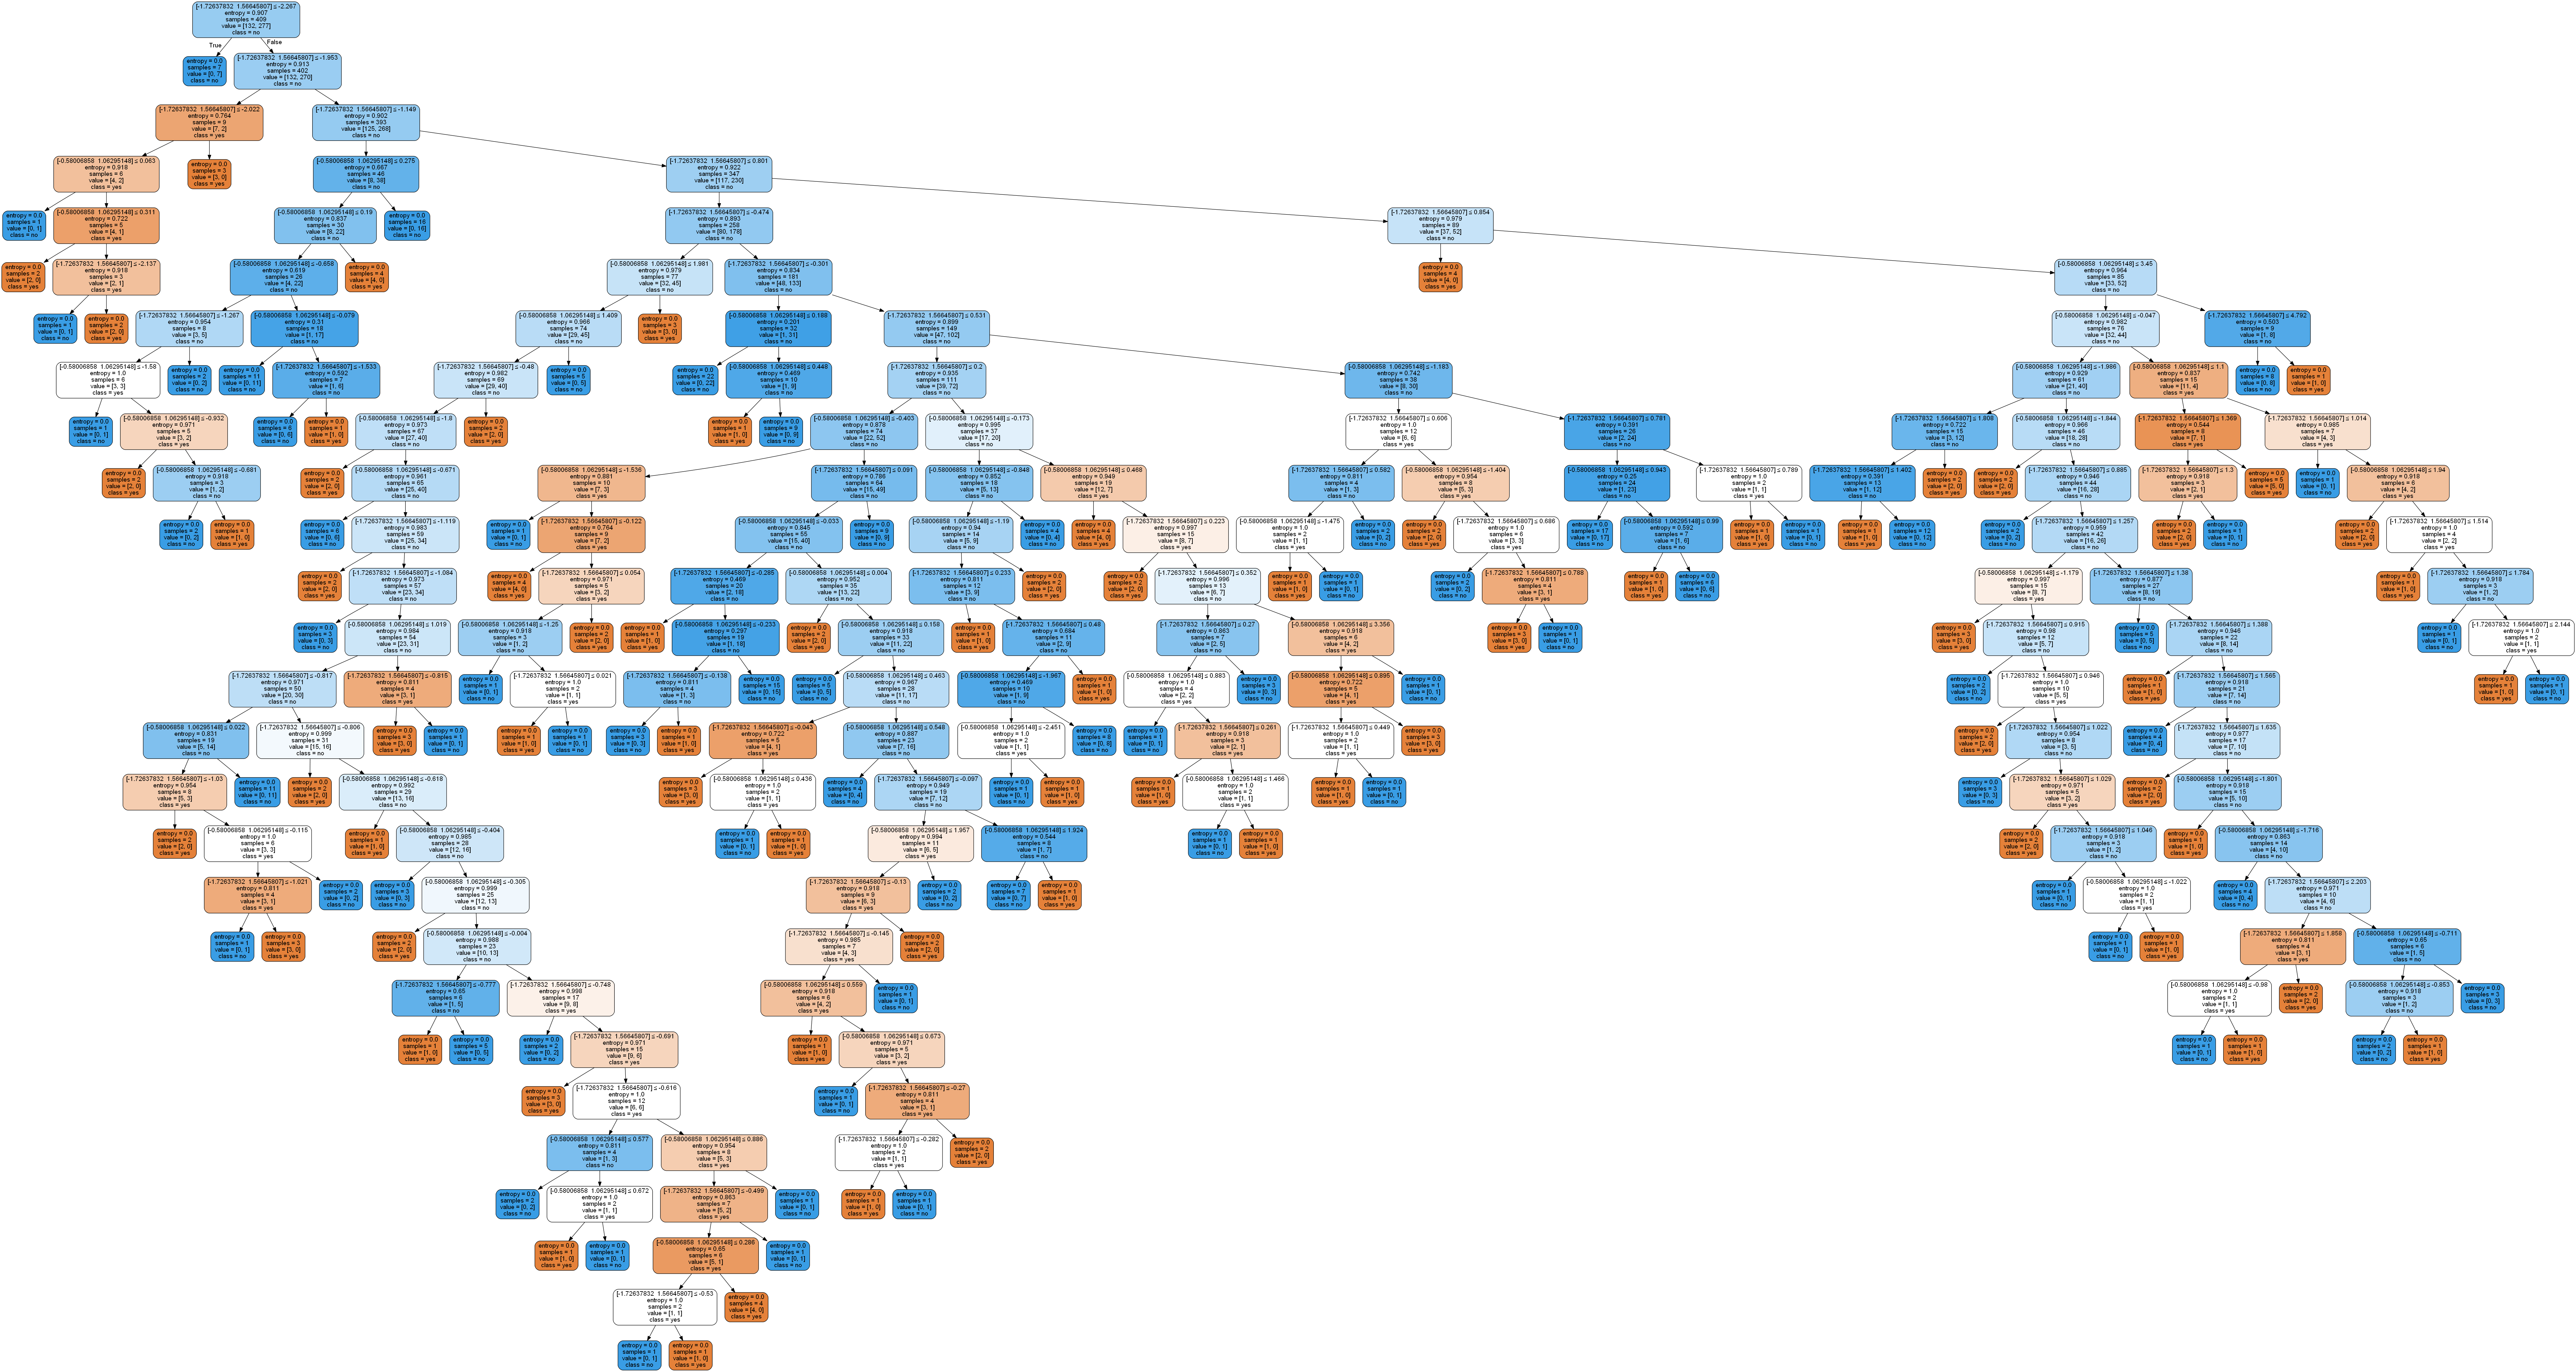

In [30]:


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_test[0:2],class_names=["yes","no"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [31]:
# # Fitting Decision Tree Classification to the Training set
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier,export_graphviz
# classifier1 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier1=classifier1.fit(X_train, y_train)

In [32]:
# tree.export_graphviz(classifier1)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [33]:
#KNN classifier
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y

In [35]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_pred=np.array(label.fit_transform(y_pred))
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1])

In [36]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN Classifier is: ', metrics.accuracy_score(y_pred, y_test))
print('The Error Rate of KNN Classifier is: ', (1-metrics.accuracy_score(y_pred, y_test))*100)

The accuracy of KNN Classifier is:  0.6292682926829268
The Error Rate of KNN Classifier is:  37.073170731707314


In [37]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[[ 11  49]
 [ 27 118]]
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        60
           1       0.71      0.81      0.76       145

    accuracy                           0.63       205
   macro avg       0.50      0.50      0.49       205
weighted avg       0.58      0.63      0.60       205



In [38]:
#Compute a simple cross tabulation of two (or more) factors.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,11,49,60
1,27,118,145
All,38,167,205


In [39]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.18      0.22        60
           1       0.71      0.81      0.76       145

    accuracy                           0.63       205
   macro avg       0.50      0.50      0.49       205
weighted avg       0.58      0.63      0.60       205



In [40]:
#  ROC Curve True Positive Rate vs False Positive Rate
y_pred_proba = classifier.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


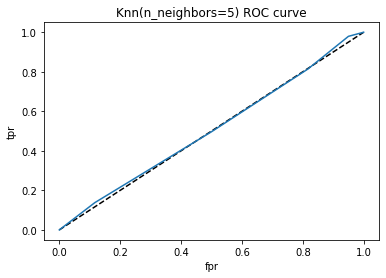

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [42]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5061494252873563

In [43]:
#K-means clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = data[["LoanAmount","ApplicantIncome"]]
print(X)

     LoanAmount  ApplicantIncome
0    146.412162             5849
1    128.000000             4583
2     66.000000             3000
3    120.000000             2583
4    141.000000             6000
..          ...              ...
609   71.000000             2900
610   40.000000             4106
611  253.000000             8072
612  187.000000             7583
613  133.000000             4583

[614 rows x 2 columns]


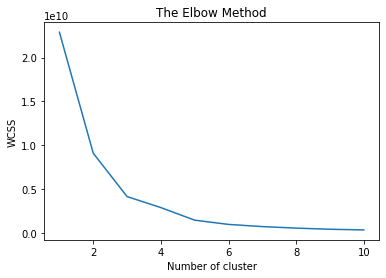

In [44]:
# Elbow methd is a heuristic used in determining the optimal number of clusters in a data set
from sklearn.cluster import KMeans
wcss=[]   # wcss is the summation of the each clusters distance between that specific clusters each points against the cluster centroid
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [45]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No         0.0      Graduate            No   
1    LP001003    Male     Yes         1.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No         0.0      Graduate            No   
610  LP002979    Male     Yes         3.0      Graduate            No   
611  LP002983    Male     Yes         1.0      Graduate            No   
612  LP002984    Male     Yes         2.0      Graduate            No   
613  LP002990  Female      No         0.0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.41216

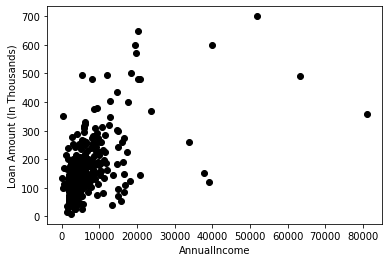

In [46]:
# plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="careful")
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Centroids")
# plt.show()
X = pd.DataFrame(data)
print(X)
# Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')

plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

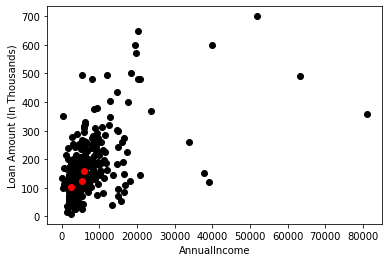

In [47]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [48]:
#Agglomerative Clustering

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [49]:
#Using the scaled data which was standarized in preprocessing using Standard Scalar

# # Normalizing the Data
x_normalized= normalize(X_train)
print(x_normalized)

# # Converting the numpy array into a pandas DataFrame 
x_normalized = pd.DataFrame(x_normalized)
print(x_normalized)

# Reducing the dimensions of the data
pca=PCA(n_components=2)
X_principal = pca.fit_transform(x_normalized)
print(X_principal)
X_principal= pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']
  
X_principal.head(2)

[[ 0.64817893 -0.76148806]
 [ 0.98947256  0.14472064]
 [ 0.22726252 -0.97383353]
 [ 0.07958217 -0.99682831]
 [ 0.48581249 -0.87406306]
 [ 0.99058791  0.13687805]
 [ 0.83468396  0.55072923]
 [-0.81779073  0.5755157 ]
 [-0.05798646 -0.99831737]
 [-0.23225287 -0.97265544]
 [-0.95168119  0.30708779]
 [-0.50733647 -0.86174805]
 [ 0.00289687 -0.9999958 ]
 [ 0.03757513 -0.99929381]
 [ 0.56796155 -0.82305509]
 [-0.69505148 -0.71895997]
 [-0.7631003  -0.64628007]
 [ 0.97057839  0.24078538]
 [ 0.71824154  0.69579386]
 [ 0.96650352  0.25665336]
 [ 0.87834977  0.47801849]
 [ 0.65559836  0.75510979]
 [ 0.8502699   0.52634694]
 [-0.6612496   0.75016596]
 [-0.91965785  0.39272056]
 [ 0.55463708 -0.83209237]
 [ 0.01664081 -0.99986153]
 [-0.52752159  0.84954162]
 [-0.51511016 -0.85712398]
 [ 0.88110284 -0.47292472]
 [-0.88895741  0.45798987]
 [ 0.8052851  -0.59288777]
 [ 0.81665514  0.57712596]
 [-0.99291972  0.11878737]
 [ 0.98844706  0.15156651]
 [-0.70806267  0.7061496 ]
 [ 0.83142632 -0.55563502]
 

,P1,P2
0,-0.925910,0.014148
1,-0.570277,0.914827


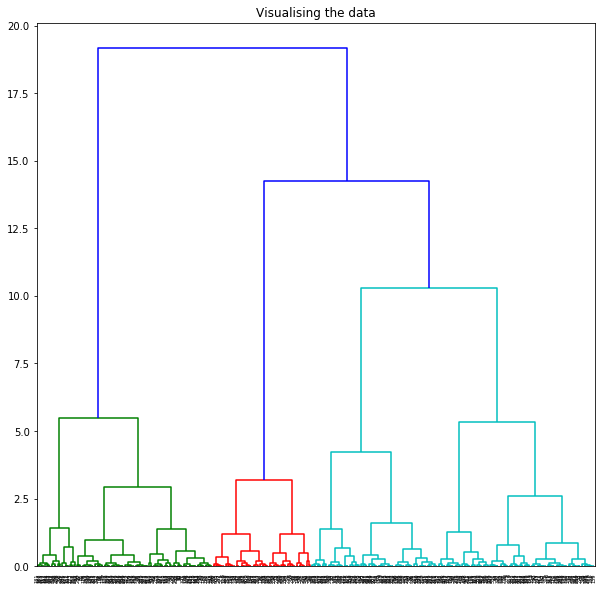

In [50]:
plt.figure(figsize=(10,10))
plt.title('Visualising the data')
dendrogram=sch.dendrogram(sch.linkage(x_normalized,method='ward'))

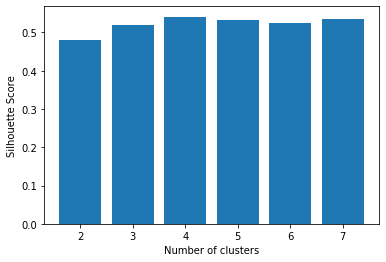

In [51]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results  based on K values
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

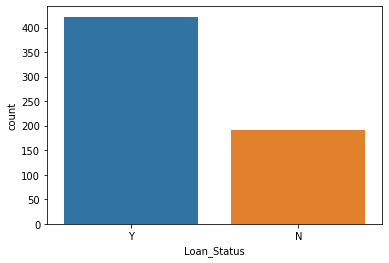

In [52]:
import seaborn as sns
sns.countplot(data.Loan_Status,label="Count")

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History']


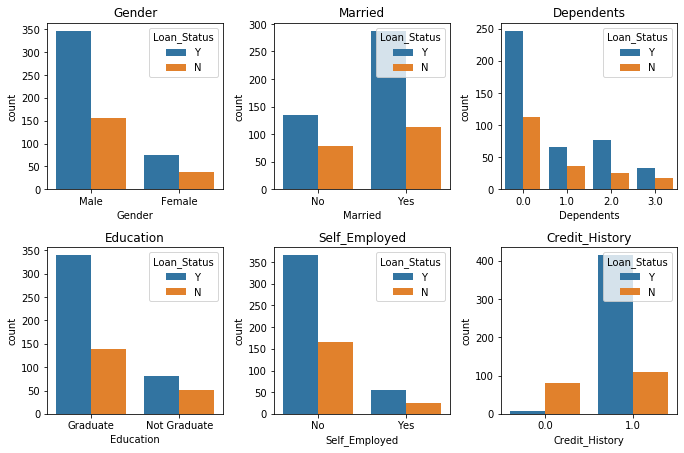

In [53]:
# cols = ['who',
cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History']

print(cols)
n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(data[cols[i]], hue=data.Loan_Status, ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Loan_Status", loc='upper right') 
        
plt.tight_layout()   #tight_layout
   

